Title : Analyzing Sales Data from Multiple File Formats
Tasks to Perform: 
 Obtain sales data files in various formats, such as CSV, Excel, and JSON. 
1. Load the sales data from each file format into the appropriate data structures or 
dataframes. 
2. Explore the structure and content of the loaded data, identifying any inconsistencies, 
missing values, or data quality issues. 
3. Perform data cleaning operations, such as handling missing values, removing 
duplicates, or correcting inconsistencies. 
4. Convert the data into a unified format, such as a common dataframe or data structure, 
to enable seamless analysis. 
5. Perform data transformation tasks, such as merging multiple datasets, splitting 
columns, or deriving new variables. 
6. Analyze the sales data by performing descriptive statistics, aggregating data by 
specific variables, or calculating metrics such as total sales, average order value, or 
product category distribution. 
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales 
data and gain insights into sales trends, customer behavior, or product performance. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 1. Load the sales data from each file format into the appropriate data structures or
# dataframes.
csv = pd.read_csv('sales_data_sample.csv', encoding="cp1252")
csv.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
excel = pd.read_excel('Sample-Sales-Data.xlsx')
excel.head()

,Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
0,2121,456,Jane,2011,84219.497311
1,2092,789,Ashish,2012,28322.192268
2,2128,456,Jane,2013,81878.997241
3,2073,123,John,2011,44491.142121
4,2134,789,Ashish,2012,71837.720959


In [4]:
json = pd.read_json('customers.json')
json.head()

,id,email,first,last,company,created_at,country
0,1,isidro_von@hotmail.com,Torrey,Veum,"Hilll, Mayert and Wolf",2014-12-25 04:06:27.981000+00:00,Switzerland
1,2,frederique19@gmail.com,Micah,Sanford,Stokes-Reichel,2014-07-03 16:08:17.044000+00:00,Democratic People's Republic of Korea
2,3,fredy54@gmail.com,Hollis,Swift,"Rodriguez, Cartwright and Kuhn",2014-08-18 06:15:16.731000+00:00,Tunisia
3,4,braxton29@hotmail.com,Perry,Leffler,"Sipes, Feeney and Hansen",2014-07-10 11:31:40.235000+00:00,Chad
4,5,turner59@gmail.com,Janelle,Hagenes,Lesch and Daughters,2014-04-21 15:05:43.229000+00:00,Swaziland


In [5]:
# 2. Explore the structure and content of the loaded data, identifying any inconsistencies,missing values, or data quality issues.
csv.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
excel.columns

Index(['Postcode', 'Sales_Rep_ID', 'Sales_Rep_Name', 'Year', 'Value'], dtype='object')

In [7]:
json.columns


Index(['id', 'email', 'first', 'last', 'company', 'created_at', 'country'], dtype='object')

In [8]:
# 3. Perform data cleaning operations, such as handling missing values, removing duplicates, or correcting inconsistencies.

# Data Cleaning For CSV 

In [9]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [10]:
csv.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [11]:
csv['ADDRESSLINE2'] = csv['ADDRESSLINE2'].fillna('Not Available')
csv = csv.drop(columns=['STATE'])
csv['TERRITORY'] = csv['TERRITORY'].fillna('Unknown')
csv = csv.drop(columns=['POSTALCODE'])
csv.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [12]:
csv.duplicated().sum()

0

In [13]:
csv.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


# Data Cleaning For excel 


In [14]:
excel.isnull().sum()

Postcode          0
Sales_Rep_ID      0
Sales_Rep_Name    0
Year              0
Value             0
dtype: int64

In [15]:
excel.duplicated().sum()

0

In [16]:
excel.describe()

,Postcode,Sales_Rep_ID,Year,Value
count,390.000000,390.000000,390.000000,390.000000
mean,2098.430769,456.000000,2012.000000,49229.388305
std,58.652206,272.242614,0.817545,28251.271309
min,2000.000000,123.000000,2011.000000,106.360599
25%,2044.000000,123.000000,2011.000000,26101.507357
50%,2097.500000,456.000000,2012.000000,47447.363750
75%,2142.000000,789.000000,2013.000000,72277.800608
max,2206.000000,789.000000,2013.000000,99878.489209


# Data Cleaning For JSON 

In [17]:
json.isnull().sum()

id            0
email         0
first         0
last          0
company       0
created_at    0
country       0
dtype: int64

In [18]:
json.duplicated().sum()

0

In [19]:
json.describe()

,id
count,9999.000000
mean,5000.000000
std,2886.607005
min,1.000000
25%,2500.500000
50%,5000.000000
75%,7499.500000
max,9999.000000


In [20]:
# 4. Convert the data into a unified format, such as a common dataframe or data structure,
unified_data = pd.concat([csv, excel,json], ignore_index=True)
unified_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,Sales_Rep_Name,Year,Value,id,email,first,last,company,created_at,country
0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,10121.0,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,10134.0,41.0,94.74,2.0,3884.34,7/1/2003 0:00,Shipped,3.0,7.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,8.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,10159.0,49.0,100.00,14.0,5205.27,10/10/2003 0:00,Shipped,4.0,10.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [21]:
unified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   ORDERNUMBER       2823 non-null   float64            
 1   QUANTITYORDERED   2823 non-null   float64            
 2   PRICEEACH         2823 non-null   float64            
 3   ORDERLINENUMBER   2823 non-null   float64            
 4   SALES             2823 non-null   float64            
 5   ORDERDATE         2823 non-null   object             
 6   STATUS            2823 non-null   object             
 7   QTR_ID            2823 non-null   float64            
 8   MONTH_ID          2823 non-null   float64            
 9   YEAR_ID           2823 non-null   float64            
 10  PRODUCTLINE       2823 non-null   object             
 11  MSRP              2823 non-null   float64            
 12  PRODUCTCODE       2823 non-null   object             
 13  C

In [22]:
# 5. Perform data transformation tasks, such as merging multiple datasets, splitting columns, or deriving new variables.

In [23]:
total_sales = unified_data['SALES'].sum()
print("Total Sales:", total_sales) 

Total Sales: 10032628.850000001


In [24]:
category_sales = unified_data.groupby('PRODUCTLINE')['SALES'].mean()

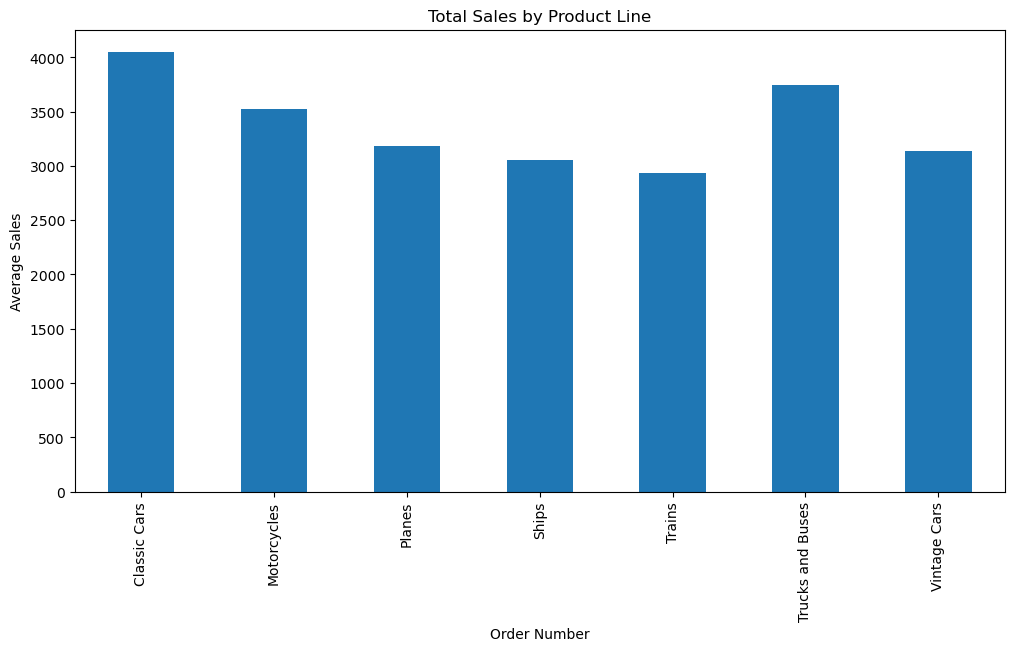

In [25]:
# Plot mean sales per order
category_sales.plot(kind='bar', figsize=(12,6))

plt.title("Total Sales by Product Line")
plt.xlabel("Order Number")
plt.ylabel("Average Sales")
plt.show() 


In [26]:
# 6. Analyze the sales data by performing descriptive statistics, aggregating data by specific variables, or calculating metrics such as total sales, average order value, or product category distribution.
# 7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales data and gain insights into sales trends, customer behavior, or product performance.

In [27]:
unified_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'Postcode',
       'Sales_Rep_ID', 'Sales_Rep_Name', 'Year', 'Value', 'id', 'email',
       'first', 'last', 'company', 'created_at', 'country'],
      dtype='object')

In [28]:
unified_data.duplicated().sum() 

0

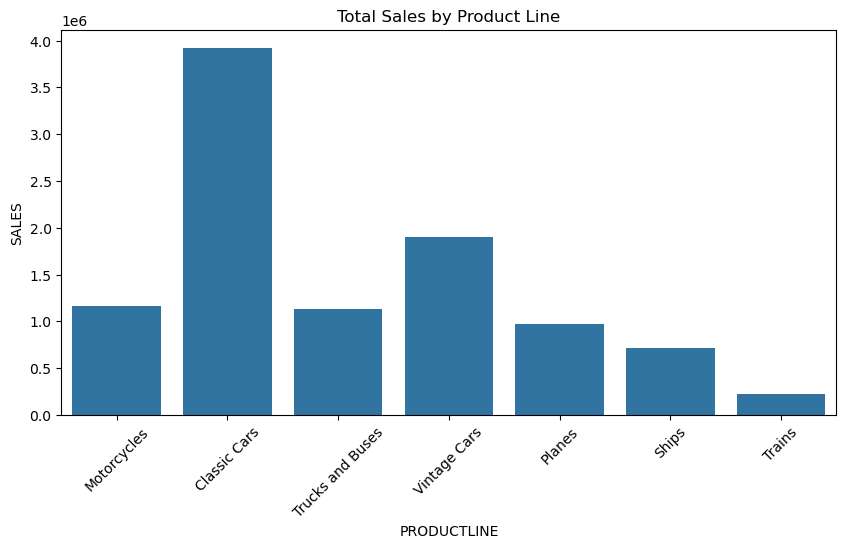

'\nThis means: for each PRODUCTLINE, sum up all the SALES values and display that as the bar height.\n\nDefault value of estimator is mean, so if you don’t specify, it will show the average sales per product line instead.\n'

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x="PRODUCTLINE", y="SALES", data=unified_data, estimator=sum, ci=None)
plt.title("Total Sales by Product Line")
plt.xticks(rotation=45)
plt.show()


"""
This means: for each PRODUCTLINE, sum up all the SALES values and display that as the bar height.

Default value of estimator is mean, so if you don’t specify, it will show the average sales per product line instead.
"""

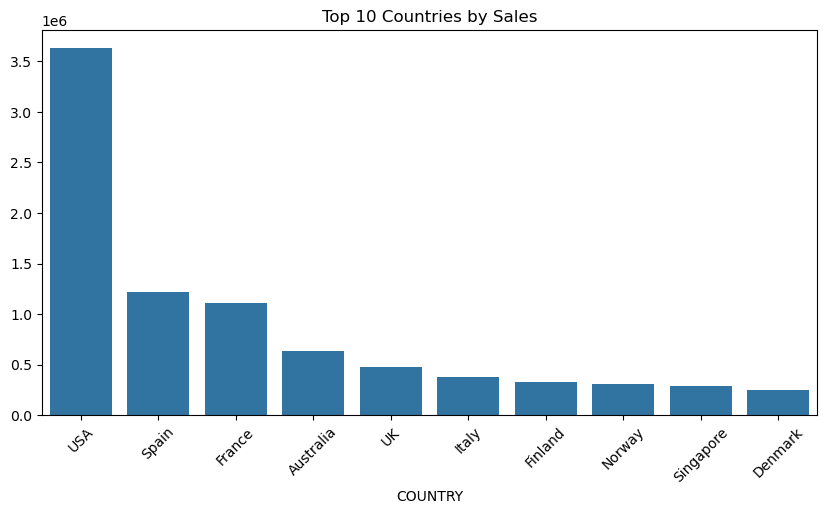

In [30]:
# Sales Distribution by Country (Top 10 countries) - Bar Plot

top_countries = unified_data.groupby("COUNTRY")["SALES"].sum().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Sales")
plt.xticks(rotation=45)
plt.show()

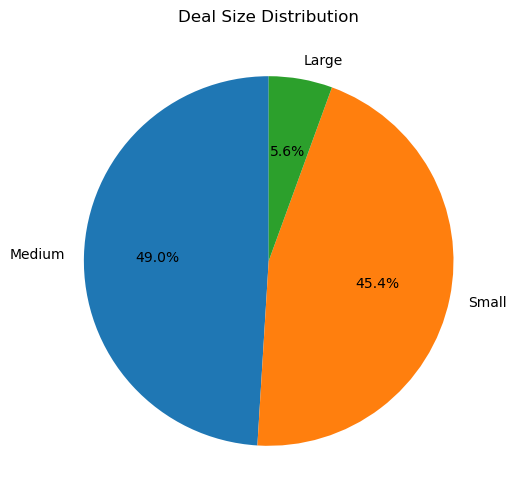

In [31]:
# Deal Size Distribution (Pie Chart)

plt.figure(figsize=(6,6))
unified_data["DEALSIZE"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Deal Size Distribution")
plt.ylabel("")  # remove y-label
plt.show()

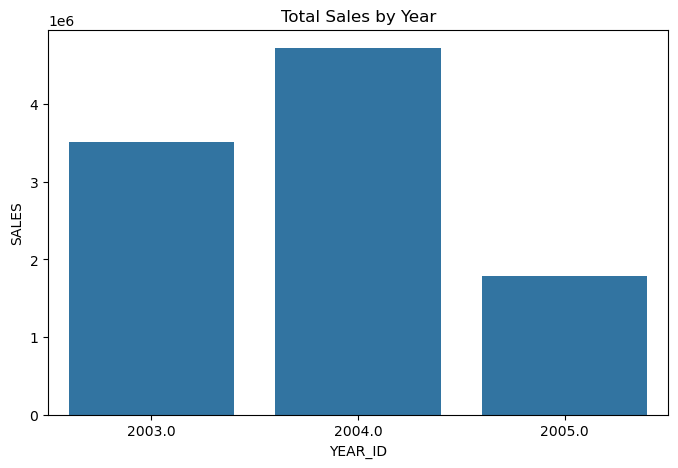

In [32]:
#  Sales by Year (Bar Plot)

plt.figure(figsize=(8,5))
sns.barplot(x="YEAR_ID", y="SALES", data=unified_data, estimator=sum, ci=None)
plt.title("Total Sales by Year")
plt.show()

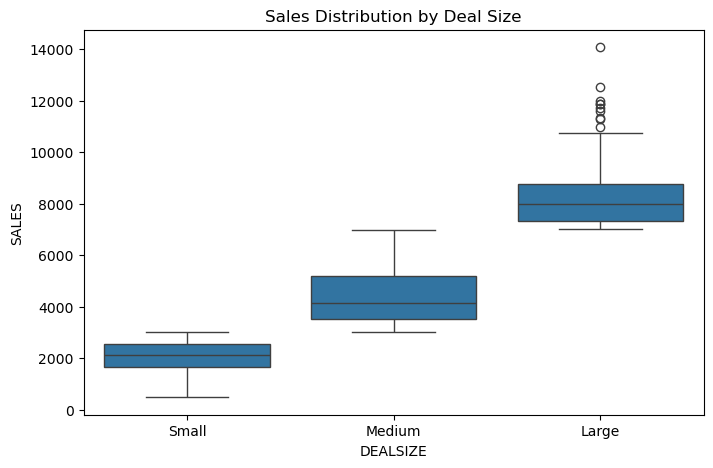

In [33]:
# Sales Distribution (Box Plot)
plt.figure(figsize=(8,5))
sns.boxplot(x="DEALSIZE", y="SALES", data=unified_data)
plt.title("Sales Distribution by Deal Size")
plt.show()